<a href="https://colab.research.google.com/github/Nargiz-chess/Solar_power_forecasting/blob/main/Results_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

from pandas import read_csv
import pandas as pd
import datetime as dt
import matplotlib
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# multivariate multi-step encoder-decoder lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import csv
import tensorflow as tf
import keras
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.regularizers import l2
from tensorflow.keras import optimizers
from keras.callbacks import TerminateOnNaN
from statistics import mean
import pickle


path1 = '/content/drive/MyDrive/Master_thesis/Datasets/Australia_numpy_removed_night_hours.npy'
path2 = '/content/drive/MyDrive/Master_thesis/Datasets/irradiance_AUS(2012-2013).csv'
path3 = '/content/drive/MyDrive/Master_thesis/Datasets/24h_irradiance_AUS(2012-2013).csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
n_house = 100
valid_house = 20 
test_house = 20  #for final predictions 

In [ ]:
import random
np.random.seed(42)

houses = np.loadtxt(path1)
shuffle = np.arange(houses.shape[1])
np.random.shuffle(shuffle)
houses = houses[:,shuffle]
irraidance=read_csv(path2, header =0, index_col=0) 
irraidance=irraidance.drop("time", axis=1)
irradiance_array= irraidance.values
weath_data = irradiance_array.reshape(irradiance_array.shape[0]*irradiance_array.shape[1])
train_val_set = houses[:,:n_house+valid_house]
train_val_set = train_val_set.reshape(train_val_set.shape[0]*train_val_set.shape[1], order="F")
weath_data_stacked = np.tile(weath_data,n_house+valid_house)
data2 = pd.DataFrame(np.column_stack((train_val_set,weath_data_stacked)))
test_set = houses[:,-20:] #don't stack. Keep aside for final predictions and loop house by house (add weath_data in each loop)


In [ ]:
print(shuffle)

[281 265 164   9  77 278  93 109   5 173  97 195 184 154  57  60 147 108
  63 140 155 104 247  46  42 275 280 116 213 236  17 239  33  24  45   7
 113 194 111  92  75  82 118  76 129 197 210 288 219 178 144 186  84 248
 277  73 244  25 209  59   6 183 185 146  30  22 254  56 237 285 126 228
 283 255 158 225  78  66 296 192 181  19 170  79  90 132  72  15  10 157
 224  68 222  37  16 119 268 269  67 101  69  31 172 148 223 114  18 179
  96 165 291  86 246 143 231 124 139 152 204  55 232 182 180 137 251  38
 125 193 167 203 112 264 117 282 273 221 176   2 115 177 175 120 208 259
 127  74  29  83 261 107 287 245 250 294 230  65 196  85 211 159  12  35
  28 142 229 279 168  51  95 206 218  41  89 215 136  26 292 141 198   0
 267 271 100 258 253 171  98  36  61 150 234 200 240  11 295 266  27 242
   4 122  32 202 162 226 256 138  62 135 128 289   8  70 263  64  44 233
 156  40 123 274 216 153  23 260 110  81 207 212  39 238 290 284 199  14
  47  94 262 227 272 201 161  43 217 145 190 220 24

#Links to the predictions & actuals 

In [ ]:
house = 0 #otherwise loop

path5 = '/content/drive/MyDrive/Master_thesis/Results/LSTM/E30_B16_house_'      #+str(house)+'_input_18.csv'
path6 = '/content/drive/MyDrive/Master_thesis/Results/LSTM/B16_E30_house_'      #+str(house)+'_input_54.csv'
path7 = '/content/drive/MyDrive/Master_thesis/Results/LSTM/B64_E30_HL50_'       #+str(house)+'_input_90.csv'
path8 = '/content/drive/MyDrive/Master_thesis/Results/LSTM/B64_E30_HL50_'       #+str(house)+'_input_180.csv'
path9 = '/content/drive/MyDrive/Master_thesis/Results/ConvLSTM/B16_E30_house_'        #+str(house)+'_input_'+str(18)+'.csv'
path10 = '/content/drive/MyDrive/Master_thesis/Results/ConvLSTM/E30_B16_HL50_house_'  #+str(house)+'_input_'+str(54)+'.csv'
path11 = '/content/drive/MyDrive/Master_thesis/Results/ConvLSTM/E30_B32_HL50_house_'  #+str(house)+'_input_'+str(90)+'.csv'
path12 = '/content/drive/MyDrive/Master_thesis/Results/ConvLSTM/E30_B16_HL50_house_'  #+str(house)+'_input_180.csv' 
path13 = '/content/drive/MyDrive/Master_thesis/Results/Baseline/Average/Input='          #str(18)+'house_num='+str(house)+'.csv'
path14 = '/content/drive/MyDrive/Master_thesis/Results/Baseline/Average/Input='          #+str(54)+'house_num='+str(house)+'.csv'
path15 = '/content/drive/MyDrive/Master_thesis/Results/Baseline/Average/Input='          #+str(90)+'house_num='+str(house)+'.csv'
path16 = '/content/drive/MyDrive/Master_thesis/Results/Baseline/Average/Input='          #+str(180)+'house_num='+str(house)+'.csv'

actual = test_set[:,house].reshape(365,18)
print("actual shape = ",actual.shape)

actual shape =  (365, 18)


#Storing errors

In [ ]:
# #input = 180

# for house in range(test_set.shape[1]):
#   actual = test_set[input:,house]
#   actual = actual.reshape(int(actual.shape[0]/18),18)
#   path = path16+str(input)+'house_num='+str(house)+'.csv'
#   pred_house = read_csv(path,header=None)    #add [:-1] for ConvLSTM and LSTM to remove the last prediction (no actual there) 
#   pred_house=np.array(pred_house)
#   for day in range(actual.shape[0]):
#     error = actual[day,:] - pred_house[day,:]
#     with open('/content/drive/MyDrive/Master_thesis/Errors/Average_input_day_'+str(int(input/18))+'_house_'+str(house)+'.csv','a') as nd:
#       write_n = csv.writer(nd)
#       write_n.writerow(error)

#Distribution of error

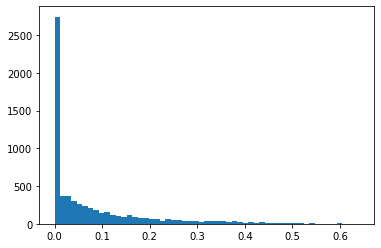

In [ ]:
input = 18
house = 5
path = '/content/drive/MyDrive/Master_thesis/Errors/LSTM/LSTM_input_day_'+str(int(input/18))+'_house_'+str(house)+'.csv'
LSTM_1_0 = read_csv(path,header=None)
LSTM_1_0 =np.abs(np.array(LSTM_1_0).flatten())
plt.hist(LSTM_1_0,bins = 'auto')
plt.show()

##Hourly 

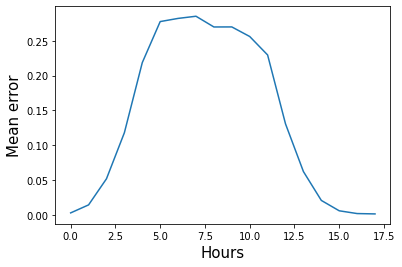

In [ ]:
#average of across days for each hour in one house

input = 180
house = 9
path = '/content/drive/MyDrive/Master_thesis/Errors/LSTM/LSTM_input_day_'+str(int(input/18))+'_house_'+str(house)+'.csv'
path2 = '/content/drive/MyDrive/Master_thesis/Errors/CovLSTM/CovLSTM_input_day_'+str(int(input/18))+'_house_'+str(house)+'.csv'
path3 = '/content/drive/MyDrive/Master_thesis/Errors/Average/Average_input_day_'+str(int(input/18))+'_house_'+str(house)+'.csv'
LSTM_1_0 = read_csv(path,header=None)
LSTM_1_0 =np.average(np.abs(np.array(LSTM_1_0)),axis = 0)
plt.plot(LSTM_1_0)
plt.xlabel("Hours", fontsize = 15)
plt.ylabel("Mean error", fontsize = 15)
plt.show()

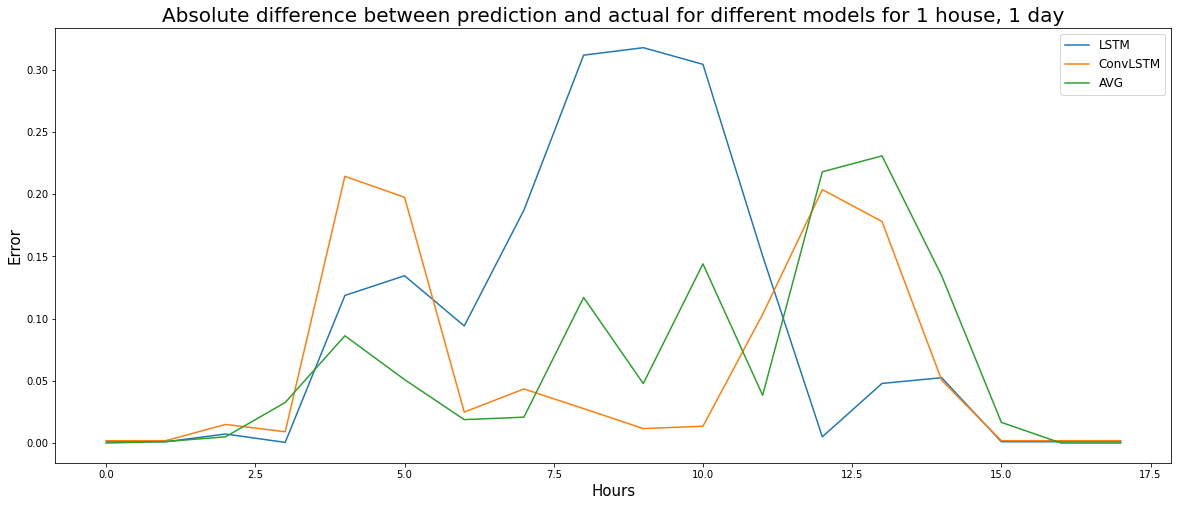

In [ ]:
#pure error - 1 house, 1 day

input = 90
house = 1
day = 180

path = '/content/drive/MyDrive/Master_thesis/Errors/LSTM_input_day_'+str(int(input/18))+'_house_'+str(house)+'.csv'
path2 = '/content/drive/MyDrive/Master_thesis/Errors/CovLSTM_input_day_'+str(int(input/18))+'_house_'+str(house)+'.csv'
path3 = '/content/drive/MyDrive/Master_thesis/Errors/Average_input_day_'+str(int(input/18))+'_house_'+str(house)+'.csv'
LSTM= read_csv(path,header=None)
LSTM =np.abs(np.array(LSTM))[day,:]

ConvLSTM= read_csv(path2,header=None)
ConvLSTM =np.abs(np.array(ConvLSTM))[day,:]

AVG = read_csv(path3,header=None)
AVG =np.abs(np.array(AVG))[day,:]

plt.figure(figsize=(20,8))
plt.plot(LSTM)
plt.plot(ConvLSTM)
plt.plot(AVG)
plt.xlabel("Hours", fontsize = 15)
plt.ylabel("Error", fontsize = 15)
plt.legend(["LSTM","ConvLSTM","AVG"],fontsize = 12)
plt.title("Absolute difference between prediction and actual for different models for 1 house, 1 day",fontsize = 20)
plt.show()

#Distribution accross hours

In [ ]:
input = 180
for hour in range(18):
  for house in range(20):
    path = '/content/drive/MyDrive/Master_thesis/Errors/ConvLSTM/CovLSTM_input_day_'+str(int(input/18))+'_house_'+str(house)+'.csv'
    csv_1= read_csv(path, header = None)
    house_array = np.array(csv_1)
    hourly_error = house_array[:,hour].flatten()
    with open('/content/drive/MyDrive/Master_thesis/Errors/Hourly_errors/ConvLSTM/Hour_'+str(hour)+'_Input_day_'+str(int(input/18))+'.csv','a') as nd:
      writer_n = csv.writer(nd)
      writer_n.writerow(hourly_error)




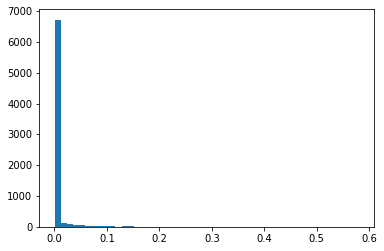

In [ ]:
input = 18
hour = 0
path = '/content/drive/MyDrive/Master_thesis/Errors/Hourly_errors/ConvLSTM/Hour_'+str(hour)+'_Input_day_'+str(int(input/18))+'.csv'
hourly_error = read_csv(path,header=None)
hourly_error =np.abs(np.array(hourly_error).flatten())

#hourly_error = hourly_error[hourly_error>0.02]
plt.hist(hourly_error,bins = 50)
plt.show()

In [ ]:
all_hours = pd.DataFrame(hourly_error)
all_hours.head()

,0
0,0.003772
1,0.003772
2,0.003772
3,0.003772
4,0.003772


In [ ]:

input_range_2 = [18,54,90,180]

for input_2 in input_range_2:
  all_hours = pd.DataFrame()
  for hour in range(0,18):
    path = '/content/drive/MyDrive/Master_thesis/Errors/Hourly_errors/ConvLSTM/Hour_'+str(hour)+'_Input_day_'+str(int(input_2/18))+'.csv'
    hourly_error = read_csv(path,header=None)
    hourly_error =np.abs(np.array(hourly_error).flatten())
    all_hours[hour]=hourly_error
  all_hours = all_hours.to_csv('/content/drive/MyDrive/Master_thesis/Errors/Hourly_errors/ConvLSTM/All_hours_Input_day_'+str(int(input_2/18))+'.csv')

In [ ]:
input = 90

path = '/content/drive/MyDrive/Master_thesis/Errors/Hourly_errors/ConvLSTM/All_hours_Input_day_'+str(int(input/18))+'.csv'
all_hours_error = read_csv(path,index_col=0)
#all_hours_error = np.array(all_hours_error)[:,1:]

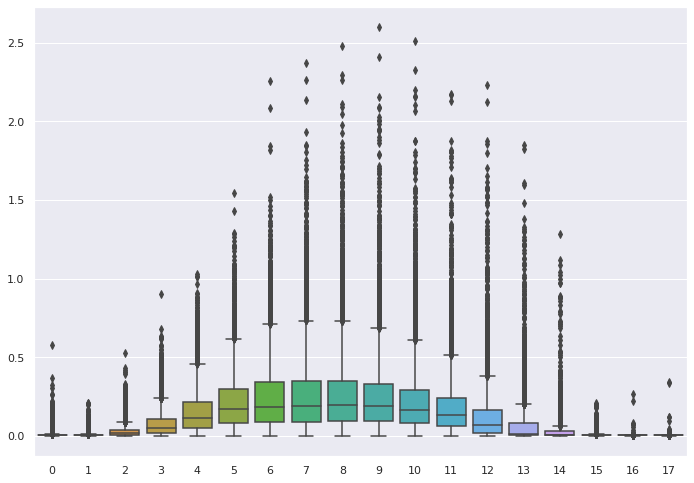

In [ ]:

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)}) 
sns.boxplot(data = all_hours_error)


#Monthly errors

In [ ]:
#dictionaries to store monthly errors
LSTM_RMSE_dict = {"LSTM_1":[],"LSTM_3":[],"LSTM_5":[],"LSTM_10":[]}
Conv_RMSE_dict = {"Conv_1":[],"Conv_3":[],"Conv_5":[],"Conv_10":[]}
Avg_RMSE_dict = {"Avg_1":[],"Avg_3":[],"Avg_5":[],"Avg_10":[]}

LSTM_MAE_dict = {"LSTM_1":[],"LSTM_3":[],"LSTM_5":[],"LSTM_10":[]}
Conv_MAE_dict = {"Conv_1":[],"Conv_3":[],"Conv_5":[],"Conv_10":[]}
Avg_MAE_dict = {"Avg_1":[],"Avg_3":[],"Avg_5":[],"Avg_10":[]}

In [ ]:
path5 = '/content/drive/MyDrive/Master_thesis/Results/LSTM/E30_B16_house_' #+str(house)+'_input_18.csv'
path6 = '/content/drive/MyDrive/Master_thesis/Results/LSTM/B16_E30_house_' #+str(house)+'_input_54.csv'
path7 = '/content/drive/MyDrive/Master_thesis/Results/LSTM/B64_E30_HL50_'  #+str(house)+'_input_90.csv'
path8 = '/content/drive/MyDrive/Master_thesis/Results/LSTM/B64_E30_HL50_'  #+str(house)+'_input_180.csv'
path9 =  '/content/drive/MyDrive/Master_thesis/Results/ConvLSTM/B16_E30_house_'        #+str(house)+'_input_'+str(18)+'.csv'
path10 = '/content/drive/MyDrive/Master_thesis/Results/ConvLSTM/E30_B16_HL50_house_'  #+str(house)+'_input_'+str(54)+'.csv'
path11 = '/content/drive/MyDrive/Master_thesis/Results/ConvLSTM/E30_B32_HL50_house_'  #+str(house)+'_input_'+str(90)+'.csv'
path12 = '/content/drive/MyDrive/Master_thesis/Results/ConvLSTM/E30_B16_HL50_house_'  #+str(house)+'_input_180.csv' 
path13 = '/content/drive/MyDrive/Master_thesis/Results/Baseline/Average/Input='          #str(18)+'house_num='+str(house)+'.csv'
path14 = '/content/drive/MyDrive/Master_thesis/Results/Baseline/Average/Input='          #+str(54)+'house_num='+str(house)+'.csv'
path15 = '/content/drive/MyDrive/Master_thesis/Results/Baseline/Average/Input='          #+str(90)+'house_num='+str(house)+'.csv'
path16 = '/content/drive/MyDrive/Master_thesis/Results/Baseline/Average/Input='          #+str(180)+'house_num='+str(house)+'.csv'



def month_divider(input):
  months = [31,31,30,31,30,31,31,28,31,30,31,30]
  month_tuples = []
  month_tuples.append([0,months[0] -int(input/18) ])
  start = months[0] -int(input/18) 
  for i in range(1,len(months)):
    month =start + months[i]
    month_tuples.append([start,month])
    start=month
  return month_tuples

n_input = 90
months = month_divider(n_input)


for month in months:
  all_houses_monthly_rmse = list()
  all_houses_monthly_mae = list()
  for house in range(test_set.shape[1]):
    actual_house = test_set[n_input:,house].reshape(365 - int(n_input/18),18)
    path ='/content/drive/MyDrive/Master_thesis/Results/ConvLSTM/E30_B32_HL50_house_'+str(house)+'_input_'+str(n_input)+'.csv'
    pred_house = read_csv(path,header=None) #add [:-1] to other models
    pred_house = np.array(pred_house)

    for day in range(month[0],month[1]):
        actual_day =  actual_house[day: day+1,:].flatten()
        pred_day = pred_house[day: day+1,:].flatten()
        #print(actual_day.shape,pred_day.shape)
        rmse = sqrt(mean_squared_error(actual_day,pred_day))
        mae= mean_absolute_error(actual_day,pred_day) 
        all_houses_monthly_rmse.append(rmse)
        all_houses_monthly_mae.append(mae)
  
  Conv_RMSE_dict["Conv_"+str(int(n_input/18))].append(mean(all_houses_monthly_rmse))
  Conv_MAE_dict["Conv_"+str(int(n_input/18))].append(mean(all_houses_monthly_mae))
print(Conv_RMSE_dict)
print(Conv_MAE_dict)


{'Conv_1': [0.17234301253675235, 0.14540357404142729, 0.1634508177407512, 0.21104940967722535, 0.21846313761497727, 0.2022029744305436, 0.2048199156804141, 0.19838787053292115, 0.1754827024055757, 0.18379353030413037, 0.15741768271258186, 0.13945352602347094], 'Conv_3': [0.16390505888103352, 0.13298565336221663, 0.16354988888157113, 0.18183287687806068, 0.18263494566119806, 0.17359944152658988, 0.1611677891746449, 0.16865135013944643, 0.1566182091954957, 0.1734936580491943, 0.14806213135342391, 0.1361694634705576], 'Conv_5': [0.1524427071774678, 0.1302974860057431, 0.1407969692134598, 0.16762636158000233, 0.1650104313116399, 0.14989787084693143, 0.1691912034106773, 0.1708440323259401, 0.15283817599575997, 0.15431228411146952, 0.14128665016652212, 0.14168027747488873], 'Conv_10': [0.14560127849978838, 0.12732335442205006, 0.12771173327545746, 0.16014764970781387, 0.18344426632648014, 0.15529272189892504, 0.1539029315082983, 0.16768060935332044, 0.15926610979029845, 0.1416519073750848, 0

In [ ]:
#Save dictionaries 
with open('/content/drive/MyDrive/Master_thesis/Errors/Monthly_errors/Conv_RMSE_monthly.pkl', 'wb') as f:
    pickle.dump(Conv_RMSE_dict, f)
        
with open('/content/drive/MyDrive/Master_thesis/Errors/Monthly_errors/Conv_MAE_monthly.pkl', 'wb') as f:
    pickle.dump(Conv_MAE_dict, f)


[[0.18805370948783848, 0.1484938654738045, 0.17813187354498966, 0.2385651700732432, 0.27541131050250434, 0.26586006955743885, 0.23144652399299603, 0.2231294038939431, 0.19736096430576144, 0.1988570493987853, 0.16719576041615747, 0.17662946692968576], [0.16581895393736162, 0.13274356863459033, 0.155826822093542, 0.20789328014175665, 0.23203702543631824, 0.24658683238977572, 0.22631313693143476, 0.2141451707538163, 0.189660285906261, 0.17483139993111507, 0.15900905869579743, 0.15825026944552195], [0.17224723232838388, 0.1355641257916482, 0.14178033554281072, 0.20180135619806408, 0.21922573538961107, 0.2260096707757161, 0.2175703558128108, 0.21285003632528182, 0.19063717622975163, 0.17978058762469343, 0.1518610336530698, 0.14226742102980375], [0.1741305909125858, 0.14553116808291905, 0.1358207117485165, 0.19606504629806115, 0.20405141755872686, 0.21991884034675294, 0.2056039509315279, 0.21060647842320865, 0.1815355833819669, 0.18606860508018477, 0.14977047132558907, 0.14660570264932124]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


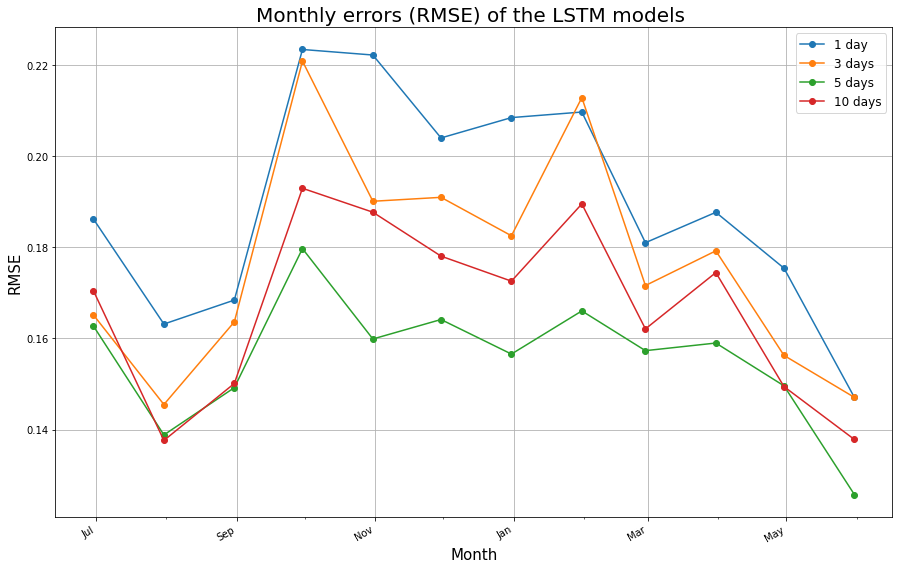

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


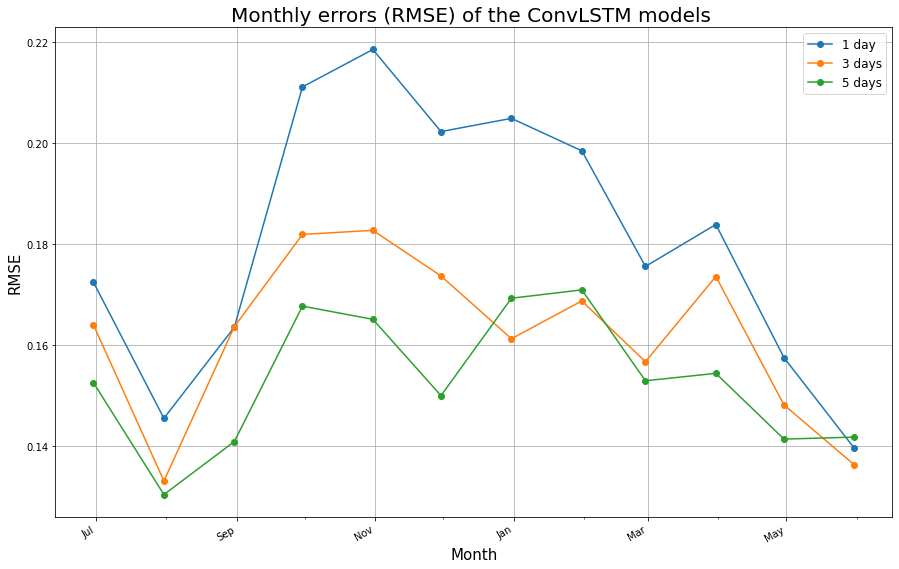

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


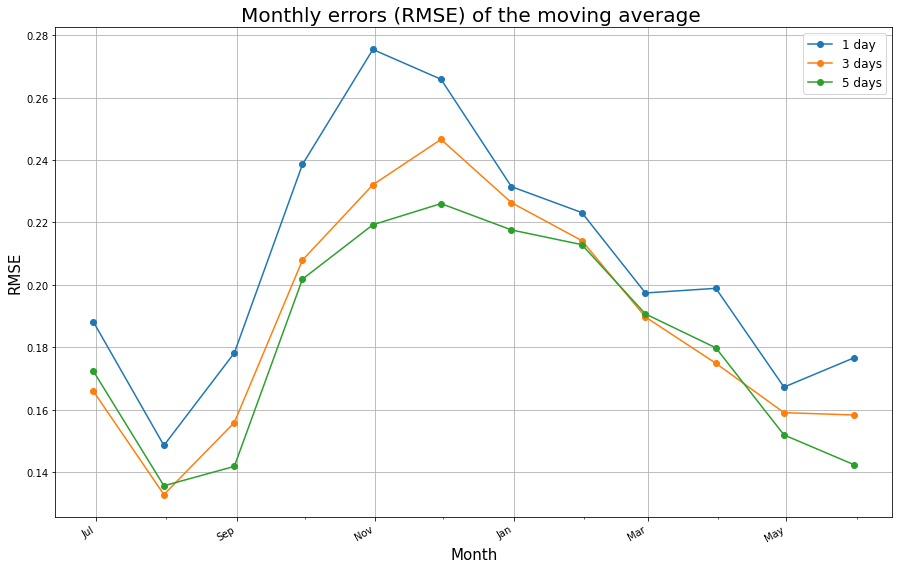

In [ ]:
with open('/content/drive/MyDrive/Master_thesis/Errors/Monthly_errors/LSTM_RMSE_monthly.pkl', 'rb') as f:
        LSTM_RMSE_dic = pickle.load(f)
with open('/content/drive/MyDrive/Master_thesis/Errors/Monthly_errors/Conv_RMSE_monthly.pkl', 'rb') as f:
        Conv_RMSE_dic = pickle.load(f)
with open('/content/drive/MyDrive/Master_thesis/Errors/Monthly_errors/Avg_RMSE_monthly.pkl', 'rb') as f:
        AVG_RMSE_dic = pickle.load(f) 



import matplotlib.dates as mdates
from datetime import date

def date_column(array,start_date='6/30/2012',frequency='M'):
  df = pd.DataFrame(array)
  df['date'] = pd.date_range(start=start_date, periods=len(df), freq=frequency)
  return df

def fig_formatter(ax):
    months = mdates.MonthLocator()
    myFmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_formatter(myFmt)
    plt.gcf().autofmt_xdate()
    plt.grid()
    ax.xaxis.set_minor_locator(months)
    # ax.xaxis.grid(True, 'major', linewidth=1)
    # ax.xaxis.grid(True, 'minor', linewidth=0.5)

plt.figure(figsize=(15,10))
df = date_column(LSTM_RMSE_dic['LSTM_1'])
df2 = date_column(LSTM_RMSE_dic['LSTM_3'])
df3 = date_column(LSTM_RMSE_dic['LSTM_5'])
df4 = date_column(LSTM_RMSE_dic['LSTM_10'])
plt.plot_date(df['date'], df[0], '-o')
plt.plot_date(df2['date'], df2[0], '-o')
plt.plot_date(df3['date'], df3[0], '-o')
plt.plot_date(df4['date'], df4[0], '-o')
ax = plt.subplot(111)
fig_formatter(ax)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(["1 day","3 days","5 days","10 days"],fontsize = 12)
plt.title("Monthly errors (RMSE) of the LSTM models ",fontsize = 20)
plt.show()

plt.figure(figsize=(15,10))
df = date_column(Conv_RMSE_dic['Conv_1'])
df2 = date_column(Conv_RMSE_dic['Conv_3'])
df3 = date_column(Conv_RMSE_dic['Conv_5'])
plt.plot_date(df['date'], df[0], '-o')
plt.plot_date(df2['date'], df2[0], '-o')
plt.plot_date(df3['date'], df3[0], '-o')
ax = plt.subplot(111)
fig_formatter(ax)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(["1 day","3 days","5 days","10 days"],fontsize = 12)
plt.title("Monthly errors (RMSE) of the ConvLSTM models ",fontsize = 20)
plt.show()

plt.figure(figsize=(15,10))
df = date_column(AVG_RMSE_dic['Avg_1'])
df2 = date_column(AVG_RMSE_dic['Avg_3'])
df3 = date_column(AVG_RMSE_dic['Avg_5'])
plt.plot_date(df['date'], df[0], '-o')
plt.plot_date(df2['date'], df2[0], '-o')
plt.plot_date(df3['date'], df3[0], '-o')
ax = plt.subplot(111)
fig_formatter(ax)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(["1 day","3 days","5 days","10 days"],fontsize = 12)
plt.title("Monthly errors (RMSE) of the moving average ",fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


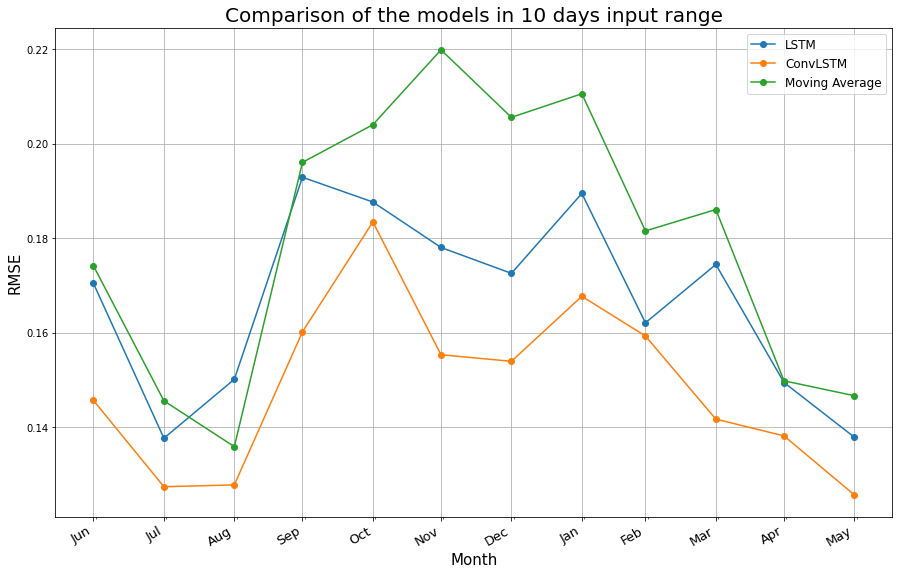

In [ ]:
plt.figure(figsize=(15,10))
df = date_column(LSTM_RMSE_dic['LSTM_10'])
df2 = date_column(Conv_RMSE_dic['Conv_10'])
df3 = date_column(AVG_RMSE_dic['Avg_10'])
plt.plot_date(df['date'], df[0], '-o')
plt.plot_date(df2['date'], df2[0], '-o')
plt.plot_date(df3['date'], df3[0], '-o')
ax = plt.subplot(111)
fig_formatter(ax)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(["LSTM","ConvLSTM","Moving Average"],fontsize = 12)
plt.title("Comparison of the models in 10 days input range",fontsize = 20)
plt.xticks(df['date'], fontsize = 13)
plt.show()


In [ ]:
AVG_RMSE_dic.values()

dict_values([[0.18805370948783848, 0.1484938654738045, 0.17813187354498966, 0.2385651700732432, 0.27541131050250434, 0.26586006955743885, 0.23144652399299603, 0.2231294038939431, 0.19736096430576144, 0.1988570493987853, 0.16719576041615747, 0.17662946692968576], [0.16581895393736162, 0.13274356863459033, 0.155826822093542, 0.20789328014175665, 0.23203702543631824, 0.24658683238977572, 0.22631313693143476, 0.2141451707538163, 0.189660285906261, 0.17483139993111507, 0.15900905869579743, 0.15825026944552195], [0.17224723232838388, 0.1355641257916482, 0.14178033554281072, 0.20180135619806408, 0.21922573538961107, 0.2260096707757161, 0.2175703558128108, 0.21285003632528182, 0.19063717622975163, 0.17978058762469343, 0.1518610336530698, 0.14226742102980375], [0.1741305909125858, 0.14553116808291905, 0.1358207117485165, 0.19606504629806115, 0.20405141755872686, 0.21991884034675294, 0.2056039509315279, 0.21060647842320865, 0.1815355833819669, 0.18606860508018477, 0.14977047132558907, 0.14660570

In [ ]:
model = "Conv"

# avg = np.array(list(AVG_RMSE_dic.values()))
# avg=np.round(avg,2)
# avg=avg.to_csv

#avg = pd.DataFrame(AVG_RMSE_dic).round(2).to_csv('/content/drive/MyDrive/Master_thesis/Errors/Monthly_errors/Latex_Avg.csv')
#avg = pd.DataFrame(AVG_RMSE_dic, index =["Jan","Feb","Mar","Apr","May","Jun","Jul","Avg","Sep","Oct","Nov","Dec"])

sec = np.array(list(Conv_RMSE_dic.values()))[:,6:12]
fir=np.array(list(Conv_RMSE_dic.values()))[:,0:6]
full = np.concatenate((sec,fir),axis=1).transpose()
full = pd.DataFrame(full, index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Avg","Sep","Oct","Nov","Dec"], 
                    columns = [model+"_day 1", model+"_day 3", model+"_day 5", model+"_day 10"]).round(2).to_csv('/content/drive/MyDrive/Master_thesis/Errors/Monthly_errors/Latex_'+model+'.csv')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


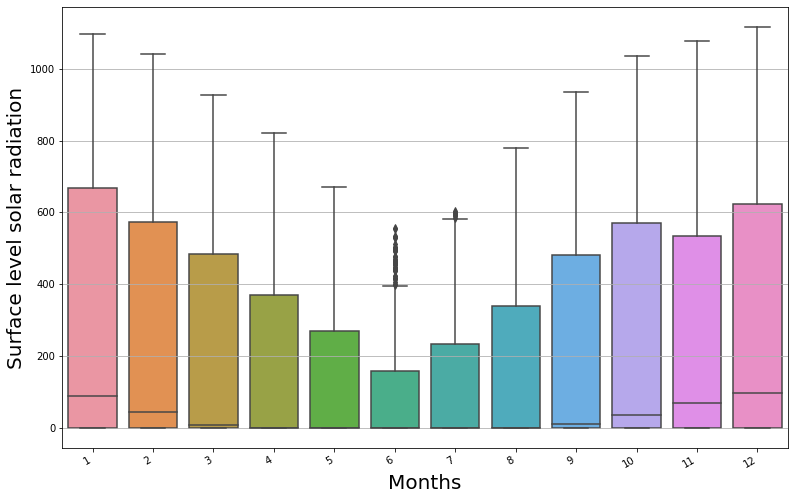

In [ ]:
# weat_24h = read_csv(path3,header =0, index_col=0)
# weat_24h= weat_24h.drop("time", axis = 1)
# weat_24h.index = pd.to_datetime(weat_24h.index)
#weat_24h = pd.Series(weat_24h['radiation_surface'],index=weat_24h.index)
weat_24h.head()

# import seaborn


fig, ax = plt.subplots(figsize=(13,9))
fig_formatter(ax)
seaborn.boxplot(weat_24h.index.month, weat_24h, ax=ax)
plt.xlabel("Months", fontsize=20)
plt.ylabel("Surface level solar radiation", fontsize=20)
#plt.title("Monthly solar irradiance in Sydney", fontsize=20)
plt.show()



(18,)


[]

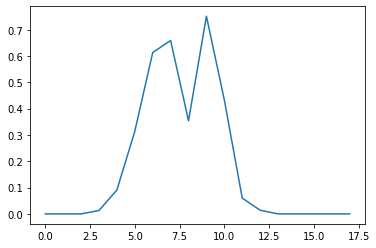

In [ ]:
path =  '/content/drive/MyDrive/Master_thesis/Results/Baseline/Average/Input='+str(18)+'house_num='+str(0)+'.csv'
file = read_csv(path, header=None)
file = np.array(file)[0,:]
print(file.shape)
plt.plot(file)
plt.plot()

# EVALUATION ###

In [ ]:


print("Shape of the test set = ", test_set.shape)
print("Shape of the weather set = ", weath_data.shape)
n_input = 18
# substract hours with input length from the beginning of the data
data = test_set[n_input:,:]
from statistics import mean

RMSEs = list()
MAEs=list()

for house in range(data.shape[1]):
  actual_house = data[:,house]
  path ='/content/drive/MyDrive/Master_thesis/Results/LSTM/E30_B16_house_'+str(house)+'_input_'+str(n_input)+'.csv'
  pred_house = read_csv(path,header=None)[:-1]
  pred_house = np.array(pred_house)
  #print(actual_house.shape,pred_house.shape)
  
  row_pred = 0
  for hours in range(0,data.shape[0]-n_input,18):
  #for hours in range(1):
    actual =  actual_house[hours: 18+hours]
    pred = pred_house[row_pred,:]
 
    rmse = sqrt(mean_squared_error(actual,pred))
    RMSEs.append(rmse)
    mae= mean_absolute_error(actual,pred) 
    MAEs.append(mae)
    row_pred+=1

print("RMSE",mean(RMSEs),"Shape of RMSEs = ", np.array(RMSEs).shape)
print("MAE",mean(MAEs),"Shape of MAEs = ", np.array(MAEs).shape)

Shape of the test set =  (6570, 20)
Shape of the weather set =  (6570,)
RMSE 0.18977863311960003 Shape of RMSEs =  (7260,)
MAE 0.1237781502659555 Shape of MAEs =  (7260,)


In [ ]:
### EVALUATION ###

print("Shape of the test set = ", test_set.shape)
print("Shape of the weather set = ", weath_data.shape)
n_input = 18
# substract hours with input length from the beginning of the data
data = test_set[n_input:,:]
from statistics import mean

RMSEs = list()
MAEs=list()
errors = list()

for house in range(data.shape[1]):
  actual_house = data[:,house]
  path ='/content/drive/MyDrive/Master_thesis/Results/LSTM/E30_B16_house_'+str(house)+'_input_'+str(n_input)+'.csv'
  pred_house = read_csv(path,header=None)[:-1]
  pred_house = np.array(pred_house)
  #print(actual_house.shape,pred_house.shape)
  
  row_pred = 0
  for hours in range(0,data.shape[0]-n_input,18):
  #for hours in range(1):
    actual =  actual_house[hours: 18+hours]
    pred = pred_house[row_pred,:]
    error = np.abs(actual-pred)
    errors.append(error)
    #rmse = sqrt(mean_squared_error(actual,pred))
    #RMSEs.append(rmse)
    #mae= mean_absolute_error(actual,pred) 
    #MAEs.append(mae)
    row_pred+=1

# print("RMSE",mean(RMSEs),"Shape of RMSEs = ", np.array(RMSEs).shape)
# print("MAE",mean(MAEs),"Shape of MAEs = ", np.array(MAEs).shape)
print(np.sqrt(np.array(errors)).mean())

Shape of the test set =  (6570, 20)
Shape of the weather set =  (6570,)
0.2489150630617601


#Visualize

In [ ]:
pred = predictions.reshape(132,1)

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(132)
y1 = dataset['Production_(kWh)_Solar_Panels'][331:463]
y2 = pred

fig,ax = plt.subplots()

line1, = ax.plot(x, y1,label='Real')
line1.set_dashes([2,2,10,2])

line2, = ax.plot(x,y2,dashes=[6,2],label='Predictions')

ax.legend()
plt.show()
from sklearn.metrics import r2_score
r2 = r2_score(y1,y2)
print(r2)
from sklearn.metrics import mean_absolute_error
actual= dataset['Production_(kWh)_Solar_Panels'][331:463]
predicted = pred
actual, predicted = np.array(actual), np.array(pred)
print('mae =', mean_absolute_error(actual, predicted))
print('mape =',np.mean(np.abs((actual - predicted) / actual)) * 100)
print('RMSE =',sqrt(mean_squared_error(actual, predicted)))